# Telco Customer Churn

###### Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

In [76]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# 1 Get the Data

In [77]:
df = pd.read_csv('09 WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [78]:
def func_PM(x):
    if x=="Electronic check": return "a. Electronic check"
    else: return "b. Others"
df['PaymentMethod_bin'] = df['PaymentMethod'].apply(func_PM)

In [79]:
def func_TB(x):
    if x<=6: return "a. 06 months"
    elif x<=24: return "b. 24 months"
    elif x<=48: return "c. 48 months"
    elif x<=60: return "d. 60 months"
    else: return "e. more"
df['tenure_bin'] = df['tenure'].apply(func_TB)

In [80]:
df['TotalCharges1']=df['TotalCharges'].apply(lambda x: 0 if x == " " else x)
df['TotalCharges2']=df['TotalCharges1'].apply(lambda x: float(x))

def func_TC(x): 
    if x<=100: return "a. 100"
    elif x<=250: return "b. 250"
    elif x<=500: return "c. 500"
    elif x<=3000: return "d. 3000"
    elif x<=4500: return "e. 4500"
    else: return "f. more"
df['TotalCharges_bin'] = df['TotalCharges2'].apply(func_TC)

In [81]:
df = df[['customerID','Churn','SeniorCitizen','InternetService','Contract','PaperlessBilling',
         'PaymentMethod_bin','tenure_bin','TotalCharges_bin']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID           7043 non-null object
Churn                7043 non-null object
SeniorCitizen        7043 non-null int64
InternetService      7043 non-null object
Contract             7043 non-null object
PaperlessBilling     7043 non-null object
PaymentMethod_bin    7043 non-null object
tenure_bin           7043 non-null object
TotalCharges_bin     7043 non-null object
dtypes: int64(1), object(8)
memory usage: 550.2+ KB


# 2a SeniorCitizen

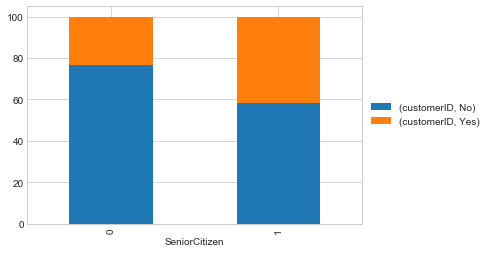

In [82]:
temp = df.pivot_table(values=['customerID'], index=['SeniorCitizen'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2b InternetService

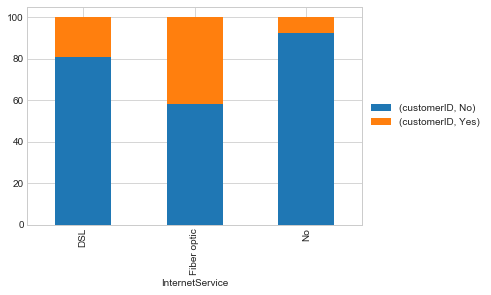

In [83]:
temp = df.pivot_table(values=['customerID'], index=['InternetService'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2c Contract

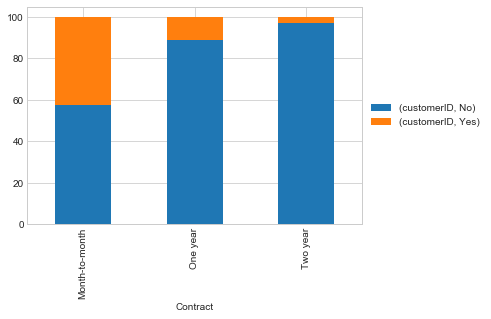

In [84]:
temp = df.pivot_table(values=['customerID'], index=['Contract'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2d PaperlessBilling

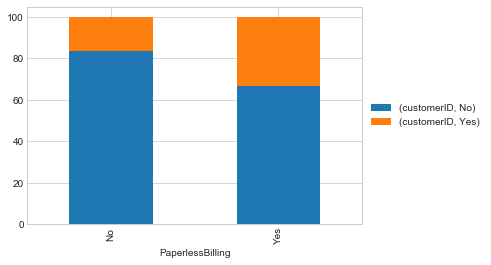

In [85]:
temp = df.pivot_table(values=['customerID'], index=['PaperlessBilling'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2e PaymentMethod_bin

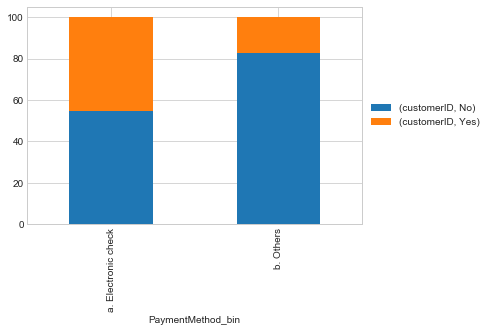

In [86]:
temp = df.pivot_table(values=['customerID'], index=['PaymentMethod_bin'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2f tenure_bin

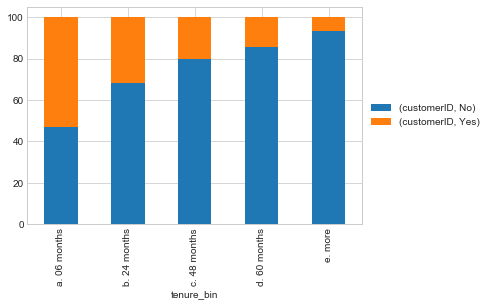

In [87]:
temp = df.pivot_table(values=['customerID'], index=['tenure_bin'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 2g TotalCharges_bin

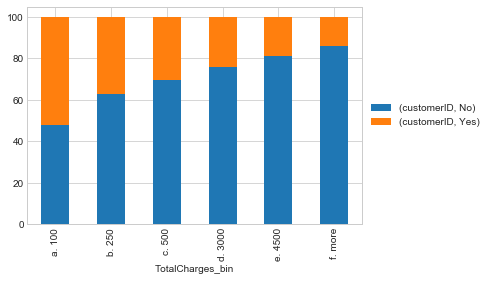

In [88]:
temp = df.pivot_table(values=['customerID'], index=['TotalCharges_bin'], columns=['Churn'], aggfunc='count')
temp = temp.apply(lambda c: c / c.sum() * 100, axis=1)
temp.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# 3 Train Test Split

In [89]:
df['actual'] = df['Churn'].apply(lambda x: 0 if x == "No" else 1)
df.drop(['customerID','Churn'],axis=1,inplace=True)

In [90]:
cat_feats = ['SeniorCitizen','InternetService','Contract','PaperlessBilling',
             'PaymentMethod_bin','tenure_bin','TotalCharges_bin']
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [91]:
x = final_data.drop(['actual'],axis=1)
y = final_data['actual']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# 4 Building the Model

In [92]:
x_train = sm.add_constant(x_train).copy()
logit = sm.Logit(y_train, x_train)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.415770
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 actual   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4913
Method:                           MLE   Df Model:                           16
Date:                Sat, 18 Nov 2017   Pseudo R-squ.:                  0.2798
Time:                        07:34:13   Log-Likelihood:                -2049.7
converged:                       True   LL-Null:                       -2846.1
                                        LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2895      0.133      2.170      0.030       0.028       0.551
SeniorCitizen_1                 0.2931      0.098      2.987      0.003       0.101       0.485
InternetService_Fiber optic     1.1124      0.103     10.844      0.000       0.911       1.313
InternetService_No             -1.1671      0.159     -7.324      0.000      -1.479      -0.855
Contract_One year              -0.6497      0.125     -5.181      0.000      -0.896      -0.404
Contract_Two year              -1.7067      0.218     -7.825      0.000      -2.134      -1.279
PaperlessBilling_Yes            0.4399      0.089      4.968      0.000       0.266       0.614
PaymentMethod_bin_b. Others    -0.4425      0.082     -5.418      0.000      -0.603      -0.282
tenure_bin_b. 24 months        -0.2095      0.204     -1.026      0.305      -0.610       0.191
tenure_bin_c. 48 months        -0.6667      0.246     -2.708      0.007      -1.149      -0.184
tenure_bin_d. 60 months        -0.9727      0.315     -3.087      0.002      -1.590      -0.355
tenure_bin_e. more             -1.2074      0.345     -3.498      0.000      -1.884      -0.531
TotalCharges_bin_b. 250        -0.8739      0.168     -5.198      0.000      -1.203      -0.544
TotalCharges_bin_c. 500        -0.9494      0.189     -5.024      0.000      -1.320      -0.579
TotalCharges_bin_d. 3000       -1.2794      0.265     -4.829      0.000      -1.799      -0.760
TotalCharges_bin_e. 4500       -1.4308      0.327     -4.371      0.000      -2.072      -0.789
TotalCharges_bin_f. more       -1.3694      0.371     -3.691      0.000      -2.097      -0.642
===============================================================================================
"""

In [93]:
x_test = sm.add_constant(x_test).copy()
y_pred = result.predict(x_test)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)
test_calc = pd.concat([x_test,y_test,pd.DataFrame(y_pred)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

max c:  0.35
max a:  0.5


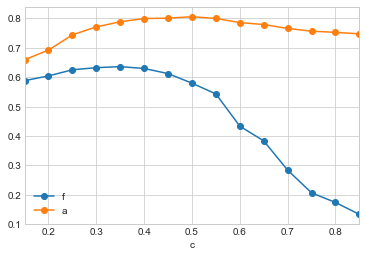

In [94]:
c = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
a = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
p = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
r = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
f = [0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85]
i = 0

for j in c:
    def flag(cols):
        x = cols[0]
        j = cols[1]
        if x > j: return 1
        else: return 0
    test_calc['j']=j
    test_calc['flag'] = test_calc[['predicted','j']].apply(flag,axis=1)
    df_table = confusion_matrix(test_calc['actual'],test_calc['flag'])
    a[i] = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
    p[i] = df_table[1,1] / (df_table[1,1] + df_table[0,1])
    r[i] = df_table[1,1] / (df_table[1,1] + df_table[1,0])
    f[i] = (2 * p[i] * r[i]) / (p[i] + r[i])
    i = i+1

df_decision = pd.concat([pd.DataFrame(c),pd.DataFrame(a),pd.DataFrame(p),pd.DataFrame(r),pd.DataFrame(f)],axis=1)
df_decision.columns = ['c','a','p','r','f']

f_max = df_decision[df_decision['f']==df_decision['f'].max()].head(1)
max_c = float(f_max['c'])
a_max = df_decision[df_decision['a']==df_decision['a'].max()].head(1)
max_a = float(a_max['c'])

df_decision.plot(x='c',y=['f','a'],marker="o")

print ("max c: ",max_c)
print ("max a: ",max_a)

# 5 Predictions and Evaluation

In [95]:
test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.35 else 0)
df_table = confusion_matrix(test_calc['actual'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[1277  269]
 [ 177  390]]
accuracy: 0.78892569806
precision: 0.591805766313
recall: 0.687830687831
f1 score:  0.636215334421
